<a href="https://colab.research.google.com/github/Tuhin805Das/MNIST_Digit_Classifier/blob/main/MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000

Test Data = 10,000


Image dimension --> 28 x 28

Grayscale image -->  1 colour channel

In [ ]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


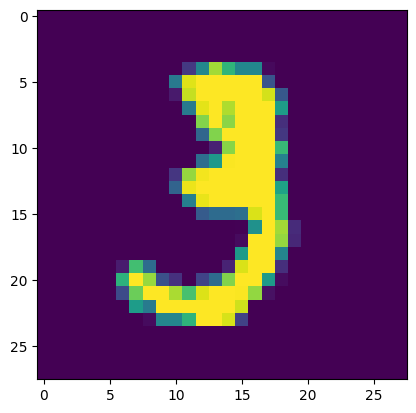

3


In [ ]:
# displaying the image

plt.imshow(X_train[10])
plt.show()

# print the corresponding label
print(Y_train[10])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset , If not , we have to
resize all the images to a common dimension

In [ ]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(X_train[10]/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network

model.fit(X_train , Y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9892
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0240 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

Training data accuracy = 98.8%

**Accuracy on test data:**

In [ ]:
loss , accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1197 - accuracy: 0.9737


Test data accuracy = 97.3%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


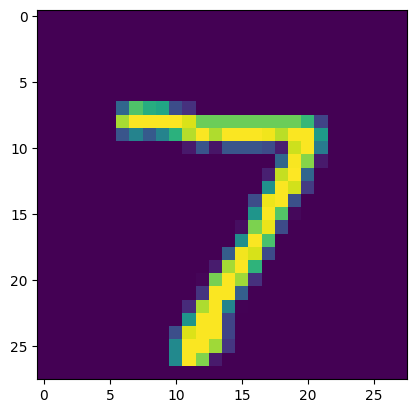

In [ ]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[5.8675932e-13 2.3173699e-04 9.6640527e-02 9.9995267e-01 1.8194560e-11
 1.6662604e-03 4.6338941e-15 1.0000000e+00 2.5636114e-02 3.2398012e-03]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class lebel

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class lebel for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 8, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
print(Y_pred)

[[5.8675932e-13 2.3173699e-04 9.6640527e-02 ... 1.0000000e+00
  2.5636114e-02 3.2398012e-03]
 [1.1313015e-03 1.0084846e-01 1.0000000e+00 ... 1.4171203e-08
  3.7909487e-01 3.3372441e-14]
 [1.7910200e-10 9.9997091e-01 1.8187027e-01 ... 6.8753916e-03
  9.3688792e-01 2.9071269e-04]
 ...
 [1.8738945e-12 1.6014435e-11 1.0838430e-11 ... 8.0573320e-02
  4.6410754e-05 7.1727896e-01]
 [2.7666127e-08 3.0595395e-09 5.0978483e-15 ... 5.4441794e-04
  7.4612522e-01 1.4734101e-14]
 [3.4745201e-02 6.2576357e-09 7.0183354e-08 ... 8.9369401e-11
  9.1318134e-03 1.1871445e-11]]


Y_test --> true labels

Y_pred_labels --> predicted labels

**Confusion Matrix**

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 965    0    1    1    0    0    5    2    4    2]
 [   0 1121    1    2    0    0    3    1    7    0]
 [   5    3 1003    9    0    0    5    3    4    0]
 [   1    0    4  987    0    8    0    5    1    4]
 [   1    1    7    1  940    2    5    6    2   17]
 [   2    0    0    7    0  875    3    1    3    1]
 [   4    1    1    2    2   11  935    0    2    0]
 [   0    5    6   11    2    0    0  991    7    6]
 [   4    1    3   13    3    7    0    3  937    3]
 [   2    3    0    5    7    7    0    7    7  971]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

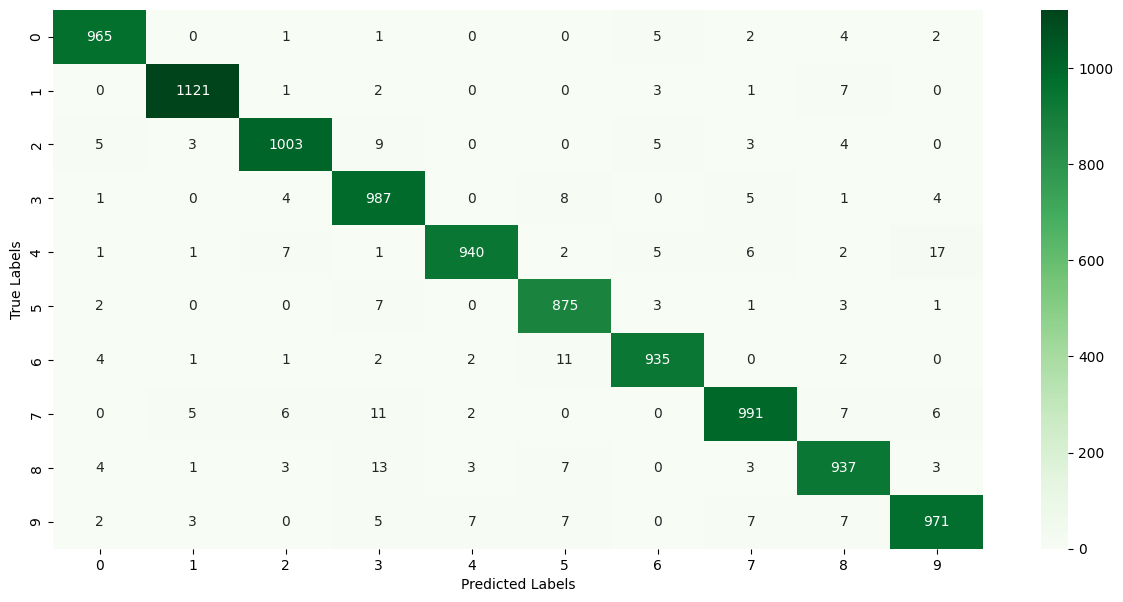

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat , annot=True , fmt='d' , cmap='Greens') # annot = gives us the numbers in each cell
plt.ylabel('True Labels')                                   # fmt ='d' gives integer values in each cell
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path = '/content/MNIST3.jpeg'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
input_image.shape

(303, 304, 3)

In [ ]:
print(input_image)

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


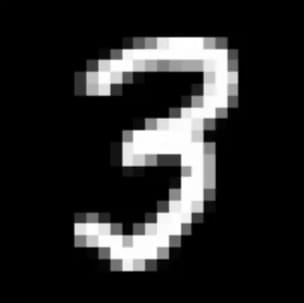

In [ ]:
cv2_imshow(input_image)

In [ ]:
# converting to grayscale image

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(303, 304)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 30ms/step
[[1.2015964e-15 3.1549344e-03 1.4859091e-11 1.0000000e+00 4.2467248e-11
  5.8132643e-01 7.1042210e-16 3.4824598e-13 9.1143221e-02 9.8309880e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predictive System

Path of the image to be predicted: /content/nine.9.png


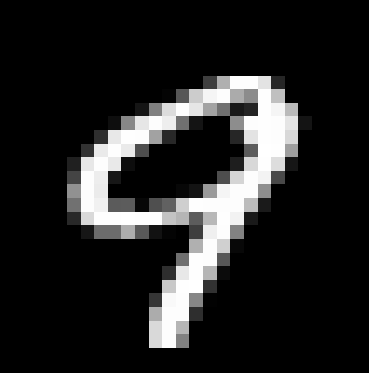

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  9


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ',input_pred_label)